# BigQuery - Sample - GitHub Timeline

This notebook demonstrates working with GitHub activity made possible via the publicly accessible GitHub Timeline BigQuery dataset via the [GitHub Archive project](http://www.githubarchive.org/).

As an interesting question, it attempts to determine "_how likely are you to program in X, if you program in Y_." For example, this might be an input into an repository exploration/recommendation/search tool to personalize the results based on your own contributions.

It is based on an example published at http://datahackermd.com/2013/language-use-on-github/. It counts pushes or commits made by all users across all repositories on GitHub, and their associated repository languages, to determine the correlation between languages.

### In this notebook you will
* Explore the BigQuery data schema for the Github Archive via the `gcp.bigquery` library
* Use the `%%sql` statement to write and execute SQL statements within the notebook
* Extract data from BigQuery and create a local dataset that can be manipulated in Python
* Refine and pivot your local dataset via the Pandas Python library
* Visualize different aspects of your dataset via the Matplotlib Python library

Related Links:

* [BigQuery](https://cloud.google.com/bigquery/)
* BigQuery [SQL reference](https://cloud.google.com/bigquery/query-reference)
* Python [Pandas](http://pandas.pydata.org/) for data analysis
* Python [matplotlib](http://matplotlib.org/) for data visualization


----

NOTE:

* The notebooks contains a snapshot of results (as of Oct 28th 2014) from previously executed code. You can simply read through the code and results, or execute each cell along the way, to get latest results.
* For an introduction to BigQuery and notebook basics, see the [full list](..) of intro notebooks.

----

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import gcp.bigquery as bq

# Understanding the Data

We're going to work with the GitHub Archive project data.  It contains all github events (commits, pushes, forks, watches, etc.) along with metadata about the events (e.g., user, time, place).

First, lets check out the table schema.

## Schema

In [2]:
table = bq.Table('githubarchive:github.timeline')
table.schema

[{ 'name': 'repository_url', 'type': 'STRING', 'mode':'NULLABLE', 'description': 'None' },
 { 'name': 'repository_has_downloads', 'type': 'BOOLEAN', 'mode':'NULLABLE', 'description': 'None' },
 { 'name': 'repository_created_at', 'type': 'STRING', 'mode':'NULLABLE', 'description': 'None' },
 { 'name': 'repository_has_issues', 'type': 'BOOLEAN', 'mode':'NULLABLE', 'description': 'None' },
 { 'name': 'repository_description', 'type': 'STRING', 'mode':'NULLABLE', 'description': 'None' },
 { 'name': 'repository_forks', 'type': 'INTEGER', 'mode':'NULLABLE', 'description': 'None' },
 { 'name': 'repository_fork', 'type': 'STRING', 'mode':'NULLABLE', 'description': 'None' },
 { 'name': 'repository_has_wiki', 'type': 'BOOLEAN', 'mode':'NULLABLE', 'description': 'None' },
 { 'name': 'repository_homepage', 'type': 'STRING', 'mode':'NULLABLE', 'description': 'None' },
 { 'name': 'repository_size', 'type': 'INTEGER', 'mode':'NULLABLE', 'description': 'None' },
 { 'name': 'repository_private', 'type': 'STRING', 'mode':'NULLABLE', 'description': 'None' },
 { 'name': 'repository_name', 'type': 'STRING', 'mode':'NULLABLE', 'description': 'None' },
 { 'name': 'repository_owner', 'type': 'STRING', 'mode':'NULLABLE', 'description': 'None' },
 { 'name': 'repository_open_issues', 'type': 'INTEGER', 'mode':'NULLABLE', 'description': 'None' },
 { 'name': 'repository_watchers', 'type': 'INTEGER', 'mode':'NULLABLE', 'description': 'None' },
 { 'name': 'repository_pushed_at', 'type': 'STRING', 'mode':'NULLABLE', 'description': 'None' },
 { 'name': 'repository_language', 'type': 'STRING', 'mode':'NULLABLE', 'description': 'None' },
 { 'name': 'repository_organization', 'type': 'STRING', 'mode':'NULLABLE', 'description': 'None' },
 { 'name': 'repository_integrate_branch', 'type': 'STRING', 'mode':'NULLABLE', 'description': 'None' },
 { 'name': 'repository_master_branch', 'type': 'STRING', 'mode':'NULLABLE', 'description': 'None' },
 { 'name': 'actor_attributes_gravatar_id', 'type': 'STRING', 'mode':'NULLABLE', 'description': 'None' },
 { 'name': 'actor_attributes_type', 'type': 'STRING', 'mode':'NULLABLE', 'description': 'None' },
 { 'name': 'actor_attributes_login', 'type': 'STRING', 'mode':'NULLABLE', 'description': 'None' },
 { 'name': 'actor_attributes_name', 'type': 'STRING', 'mode':'NULLABLE', 'description': 'None' },
 { 'name': 'actor_attributes_company', 'type': 'STRING', 'mode':'NULLABLE', 'description': 'None' },
 { 'name': 'actor_attributes_location', 'type': 'STRING', 'mode':'NULLABLE', 'description': 'None' },
 { 'name': 'actor_attributes_blog', 'type': 'STRING', 'mode':'NULLABLE', 'description': 'None' },
 { 'name': 'actor_attributes_email', 'type': 'STRING', 'mode':'NULLABLE', 'description': 'None' },
 { 'name': 'created_at', 'type': 'STRING', 'mode':'NULLABLE', 'description': 'None' },
 { 'name': 'public', 'type': 'BOOLEAN', 'mode':'NULLABLE', 'description': 'None' },
 { 'name': 'actor', 'type': 'STRING', 'mode':'NULLABLE', 'description': 'None' },
 { 'name': 'payload_head', 'type': 'STRING', 'mode':'NULLABLE', 'description': 'None' },
 { 'name': 'payload_size', 'type': 'INTEGER', 'mode':'NULLABLE', 'description': 'None' },
 { 'name': 'payload_ref', 'type': 'STRING', 'mode':'NULLABLE', 'description': 'None' },
 { 'name': 'payload_master_branch', 'type': 'STRING', 'mode':'NULLABLE', 'description': 'None' },
 { 'name': 'payload_ref_type', 'type': 'STRING', 'mode':'NULLABLE', 'description': 'None' },
 { 'name': 'payload_description', 'type': 'STRING', 'mode':'NULLABLE', 'description': 'None' },
 { 'name': 'payload_number', 'type': 'INTEGER', 'mode':'NULLABLE', 'description': 'None' },
 { 'name': 'payload_pull_request_head_label', 'type': 'STRING', 'mode':'NULLABLE', 'description': 'None' },
 { 'name': 'payload_pull_request_head_repo_name', 'type': 'STRING', 'mode':'NULLABLE', 'description': 'None' },
 { 'name': 'payload_pull_request_head_repo_master_branch', 'type': 'STRING', 'mode':'NULLABLE', 'description': 'None' },
 { 'name': 'payload_pull

The GitHub timeline is a fairly large dataset. A quick lookup of table metadata gives us the row count.

In [3]:
int(table.metadata.rows)

290147550

## Sampling the Data

With over 262 million events, it is important to be able to sample the data. The sample method allows you to sample tables, or queries.

In [4]:
table.sample(fields=['repository_name',
                     'repository_language',
                     'created_at',
                     'type'])

job_PBmOEM3C__M3Ern0XzMjQzVNPR8 (1.6s, 15GB processed) rows: 5

## Data Exploration with SQL

This SQL statement will pull a few interesting fields corresponding to repository creation events recorded in the GitHub timeline, ordered with most recent first.

In [5]:
%%sql
SELECT repository_name, type, created_at, repository_language
FROM [githubarchive:github.timeline]
WHERE type = 'CreateEvent'
ORDER BY created_at DESC
LIMIT 5

job_WZ1ESylmzzn2e2fkzpmi8sPPIcU (3.4s, 15GB processed) rows: 5

# Querying the Data

The first step in our analysis to correlate languages is going to be retrieving the appropriate slice of data.

We'll need to retrieve the list of PushEvents from the timeline. This is going to be a fairly large list of events, so there are a couple of ways to get a more manageable resultset:

* Limiting the analysis to the top 25 languages (from an otherwise really long list of languages which simply add noise).
* Limiting the analysis to just pushes made during 1 year time window.
* Further sampling to get a small, but still interesting sample set to analyze further for correlation.

## Finding the Popular Languages

In [6]:
%%sql --module popular_languages
SELECT repository_language, COUNT(repository_language) as pushes
FROM [githubarchive:github.timeline]
WHERE type = 'PushEvent'
  AND repository_language != ''
  AND PARSE_UTC_USEC(created_at) >= DATE_ADD(CURRENT_TIMESTAMP(), -1, 'YEAR')
GROUP BY repository_language
ORDER BY pushes DESC
LIMIT 25

The `popular_languages` query defined above can be executed to see the results (as done below) or referenced in subsequent queries (as shown later).

In [7]:
bq.Query(popular_languages).results()

job_3LL9Yvi8d7N5m2op_4VlzcyeyjM (4.4s, 11GB processed) rows: 25

## The Pushes

This query retrieves the push events from the timeline. Notice the reference to `popular_languages` in the query. The SQL for this query is embedded inline, allowing you to compose complex queries _before_ the query is sent to BigQuery for processing.

In [8]:
%%sql --module pushes
SELECT timeline.actor AS user,
       timeline.repository_language AS language,
       COUNT(timeline.repository_language) AS pushes
FROM [githubarchive:github.timeline] AS timeline
JOIN $popular_languages AS languages
  ON timeline.repository_language = languages.repository_language
WHERE type = 'PushEvent'
  AND PARSE_UTC_USEC(created_at) >=
      DATE_ADD(CURRENT_TIMESTAMP(), -1, 'YEAR')
GROUP BY user, language

The `pushes` query was also only defined; it hasn't been processed yet. The following query builds on it further to add sampling to further reduce the resultset, specifically to limit it to a 5% sample. Notice the use of BigQuery's built-in hashing function to perform the sampling.

In [9]:
%%sql --module sampled_pushes
SELECT user, language, pushes
FROM $pushes
WHERE ABS(HASH(user)) % 100 < 5

# Analyzing the Data

The next step is to integrate the BigQuery SQL queries with the analysis capabilities provided by python and pandas. The query defined earlier can be easily materialized into a pandas dataframe.

In [10]:
df = bq.Query(sampled_pushes, popular_languages=popular_languages, pushes=pushes).to_dataframe()
len(df)

58698

We got a resultset of just over 100K data points, from the last years worth of commits across the top-25 programming languages. And a small sample of the first 10 results...

In [11]:
df[:10]

,user,language,pushes
0,thomaslee,C++,7
1,onkar,Java,107
2,whopper,JavaScript,26
3,kisg,C++,2255
4,automenta,Java,619
5,rickcarlino,JavaScript,285
6,frwendling,C,8
7,xQxCPMxQx,C#,364
8,okias,Shell,34
9,LeYvan,PHP,13


Great, so we've successfully populated a Pandas dataframe with our dataset. Let's dig into our dataset a little further using the dataframe to see if our data makes sense.

First, let's see how many unique users exist within our dataset and also see who is the user with the most distinct languages.  We can do that by looking at the `users` column of our dataframe.

In [12]:
summary = df['user'].describe()
print 'Dataset contains', summary['count'], 'rows with', summary['unique'], 'unique users'
print 'The user with the most distinct languages is', summary['top'], 'with', summary['freq'], 'distinct languages'

Dataset contains 58698 rows with 38458 unique users
The user with the most distinct languages is gregnietsky with 15 distinct languages


Let's see the particular languages this user has pushed code for.

In [13]:
print 'Languages used by', summary['top']
df[df['user'] == summary['top']]

Languages used by gregnietsky


,user,language,pushes
342,gregnietsky,Go,8
1040,gregnietsky,C,1156
3292,gregnietsky,Perl,11
7723,gregnietsky,Ruby,12
13922,gregnietsky,Objective-C,3
16262,gregnietsky,PHP,18
24038,gregnietsky,CSS,1
25424,gregnietsky,Emacs Lisp,60
30021,gregnietsky,Python,65
35557,gregnietsky,TeX,4


## Reshaping the Data

The results we have so far, have multiple rows for each user. Specifically, one per language. The next step is to pivot that data, so we have one row per user, and one column per language. The resulting matrix will be extremely sparse. We'll just fill in 0, as in no pushes, for user/language pairs that have no data.

Pandas offers a built-in `pivot()` method, which helps here.

In [14]:
dfp = df.pivot(index = 'user', columns = 'language', values = 'pushes').fillna(0)
dfp

language,C,C#,C++,CSS,Clojure,CoffeeScript,Emacs Lisp,Go,Haskell,Java,...,Perl,Python,R,Ruby,Rust,Scala,Shell,Swift,TeX,VimL
user,,,,,,,,,,,,,,,,,,,,,
0003,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
008agent,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
00Christina,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0
00StevenG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0110,24,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
01Comandos,0,0,0,16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01esha,0,0,0,0,0,0,0,0,0,20,...,0,0,0,0,0,0,0,0,0,0
02110917,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
03florent,0,0,0,0,0,0,0,0,0,0,...,0,3,0,0,0,0,0,0,0,0


And then compute the correlation for each pair of languages, again, built-in into the pandas library.

In [15]:
corr = dfp.corr(method = 'spearman')
corr

language,C,C#,C++,CSS,Clojure,CoffeeScript,Emacs Lisp,Go,Haskell,Java,...,Perl,Python,R,Ruby,Rust,Scala,Shell,Swift,TeX,VimL
language,,,,,,,,,,,,,,,,,,,,,
C,1.000000,-0.024799,0.158939,-0.053017,-0.000576,0.001282,0.020028,0.019859,0.040105,-0.055308,...,0.038219,0.016621,-0.040139,-0.027703,0.021210,-0.012304,0.071540,-0.016062,0.047445,0.018250
C#,-0.024799,1.000000,-0.014025,-0.059115,-0.005049,-0.019917,-0.010558,-0.018237,-0.010310,-0.066862,...,-0.017965,-0.064856,-0.039961,-0.056407,-0.001581,-0.019071,-0.035465,-0.021341,-0.015060,-0.030840
C++,0.158939,-0.014025,1.000000,-0.067253,-0.011789,-0.008204,0.015618,-0.000907,0.020864,-0.061575,...,0.007637,0.014554,-0.043089,-0.047337,0.011476,-0.011850,0.027470,-0.021838,0.037829,0.002036
CSS,-0.053017,-0.059115,-0.067253,1.000000,0.005660,0.049044,-0.001431,0.007641,-0.000719,-0.100678,...,-0.009157,-0.028769,-0.050230,0.051458,0.014022,-0.014156,0.012553,-0.008081,-0.000414,0.014577
Clojure,-0.000576,-0.005049,-0.011789,0.005660,1.000000,0.005848,0.095407,0.029650,0.019366,-0.013910,...,0.012379,0.001967,0.003839,0.022365,0.012328,0.001516,0.023468,-0.002996,0.000753,0.034377
CoffeeScript,0.001282,-0.019917,-0.008204,0.049044,0.005848,1.000000,0.013401,0.032595,0.001900,-0.041758,...,0.001672,0.001613,-0.018458,0.058392,0.016486,-0.000069,0.052881,0.001367,0.001086,0.042048
Emacs Lisp,0.020028,-0.010558,0.015618,-0.001431,0.095407,0.013401,1.000000,0.040385,0.087827,-0.027156,...,0.003526,0.018722,-0.008727,0.016755,0.017631,0.013875,0.077143,-0.009596,0.014752,0.044352
Go,0.019859,-0.018237,-0.000907,0.007641,0.029650,0.032595,0.040385,1.000000,0.018963,-0.034794,...,0.007032,0.018605,-0.015416,0.032394,0.069495,0.004843,0.064645,0.003767,0.000605,0.062388
Haskell,0.040105,-0.010310,0.020864,-0.000719,0.019366,0.001900,0.087827,0.018963,1.000000,-0.014193,...,0.001886,0.013817,-0.006798,0.004602,0.035117,0.032447,0.046244,-0.001753,0.026233,0.038526


# Visualizing the Data and Analysis Results

## Finding language correlations

The correlation table above contains all the results, but isn't very telling. A plot will make the data speak a lot louder, and highlight the highly correlated languages, as well as highly uncorrelated languages.

In [16]:
# Plotting helper function
def plot_correlation(data):
    min_value = 0
    max_value = 0

    for i in range(len(data.columns)):
        for j in range(len(data.columns)):
            if i != j:
                min_value = min(min_value, data.iloc[i, j])
                max_value = max(max_value, data.iloc[i, j])
    span = max(abs(min_value), abs(max_value))
    span = round(span + .05, 1)

    items = data.columns.tolist()
    ticks = np.arange(0.5, len(items) + 0.5)

    plot.figure(figsize = (11, 7))
    plot.pcolor(data.values, cmap = 'RdBu', vmin = -span, vmax = span)
    plot.colorbar().set_label('correlation')
    plot.xticks(ticks, items, rotation = 'vertical')
    plot.yticks(ticks, items)
    plot.show()

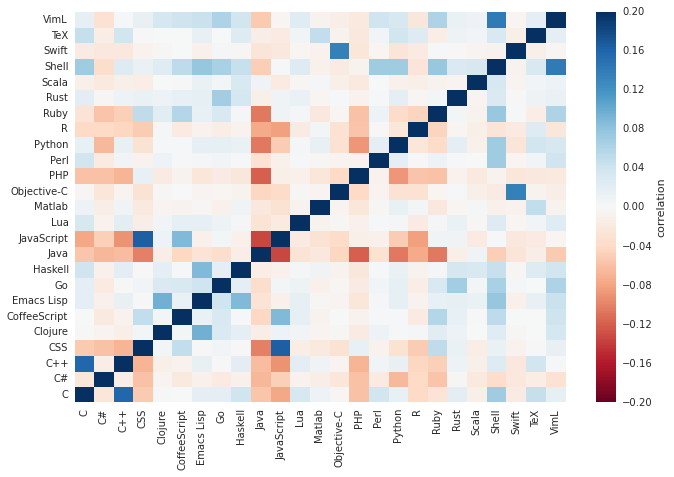

In [17]:
plot_correlation(corr)

We can see that JavaScript and HTML pushes have strong positive correlation, as well as C and C++ (good sanity check).

## Building a language map

We can take this a step further by computing the [principal components](http://en.wikipedia.org/wiki/Principal_component_analysis) of our correlation matrix. We can do this easily within our notebook like so:

In [18]:
from matplotlib.mlab import PCA
pcs = PCA(corr)
pc1, pc2 = pcs.Y[:,1], pcs.Y[:,2]

Now let's plot the first two principal components, representing each language as a point in our PCA space.  This allows us to get a high-level "map" of how the languages relate to one another.  Similar languages will appear as nearby points within this map.  Here we go.

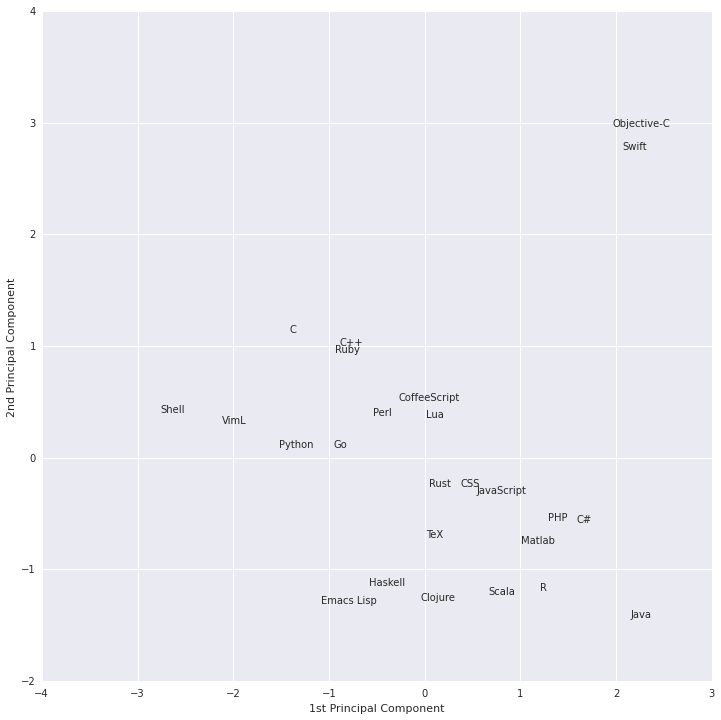

In [19]:
fig, ax = plot.subplots()
fig.set_size_inches(12, 12)

ax.scatter(pc1, pc2, alpha=0)
for i, language in enumerate(corr.columns):
    ax.annotate(language, (pc1[i], pc2[i]))

plot.xlabel('1st Principal Component')
plot.ylabel('2nd Principal Component')


We can immediately see that again, C and C++ are closely related (nearby in the diagram), indicating that developers that commit code in C to GitHub tend to also commit code in C++; Python appears as a near-neighbor.

Unsurprisingly, we see the JVM languages form a small cluster in the top-right (Java, Groovy, Scala) with Clojure bridging the gap with (Emacs) Lisp.

# Insights and Take-aways

On programming language correlation:

* No surprise ... JavaScript is highly correlated with CSS, and C with C++
* Bit surprising ... Java has some strong uncorrelations - with JavaScript, PHP and Ruby ... static vs. dynamic languages?
* Also surprising ... R seems not so correlated with Python?
* Go is not uncorrelated with anything, even if not highly correlated. Go programmers do not exclusively program in Go.
* And PHP is uncorrelated with many languages. Maybe a different developer persona.

---

This notebook demonstrated integrating BigQuery SQL queries, and python data analysis and visualization to work against the large GitHub timeline data to extract some insights and patterns around some programming languages and their respective communities.